# Example MCMC

In [1]:
# Simulated data-points from rnorm(10,3,2)
obs = c(2.27,  1.17,  3.58,  3.95,  3.13, -1.50,  4.71,  2.58,  4.05, 5.20)
# Posterior
logStatDist = function(mu,sigma)
{
   -3*log(sigma)-4*sigma-(mu-1)^2/200-(sum((obs-mu)^2)/(2*sigma^2))
}

m = rnorm(1,1,10)
s = rgamma(1,8,4)
m_sample = c()
s_sample = c()
# Baysian Data Analysis via MCMC
for(i in 1:100000)
{
    mean_prop = rnorm(1,m,.1)
    sd_prop   = abs(rnorm(1,s,.1))
    u = runif(1,0,1)
    if( u < exp(logStatDist(mean_prop,sd_prop)-logStatDist(m,s)) )
    {
        m = mean_prop
        s   = sd_prop
    }
    m_sample = c(m_sample,m)
    s_sample = c(s_sample,s)
}

## Evaluation

### Traceplot

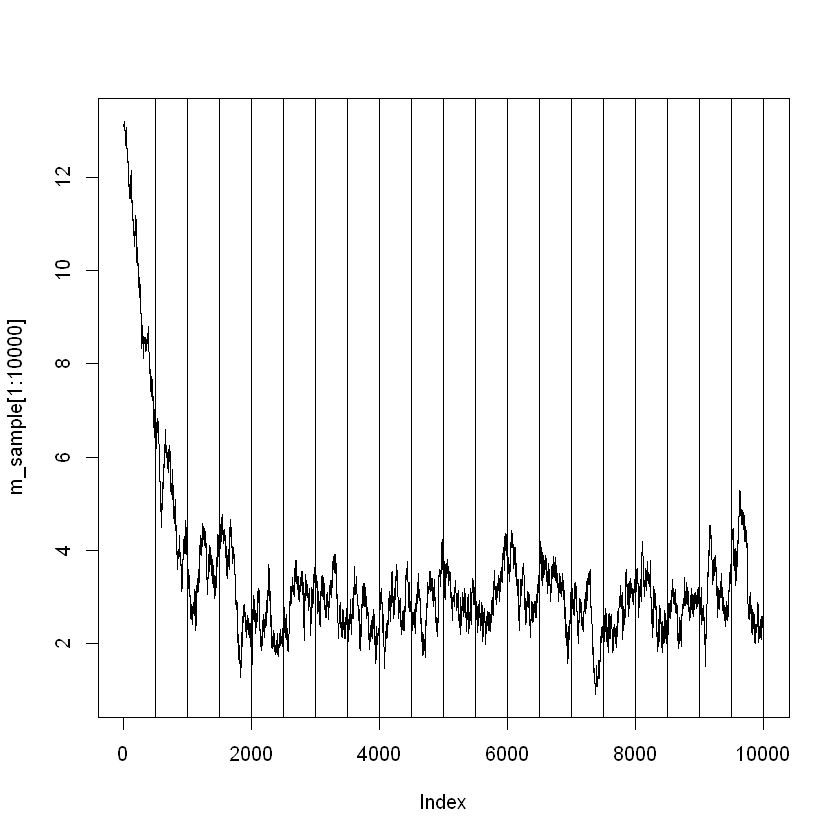

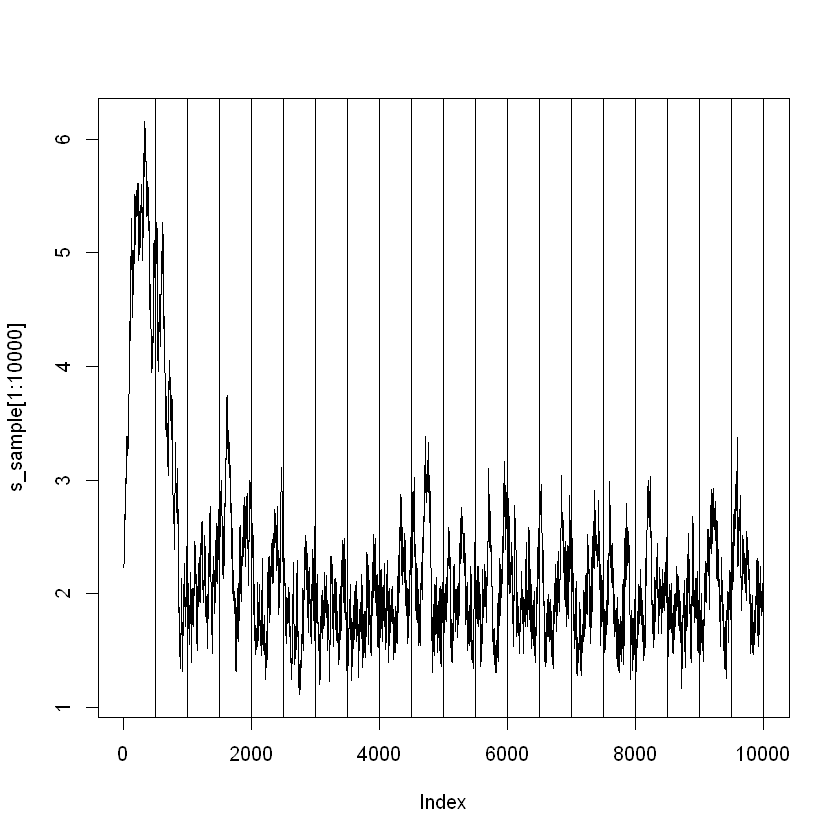

In [3]:
plot(m_sample[1:10000],type="l")
abline(v=1:1000*500)
plot(s_sample[1:10000],type="l")
abline(v=1:1000*500)

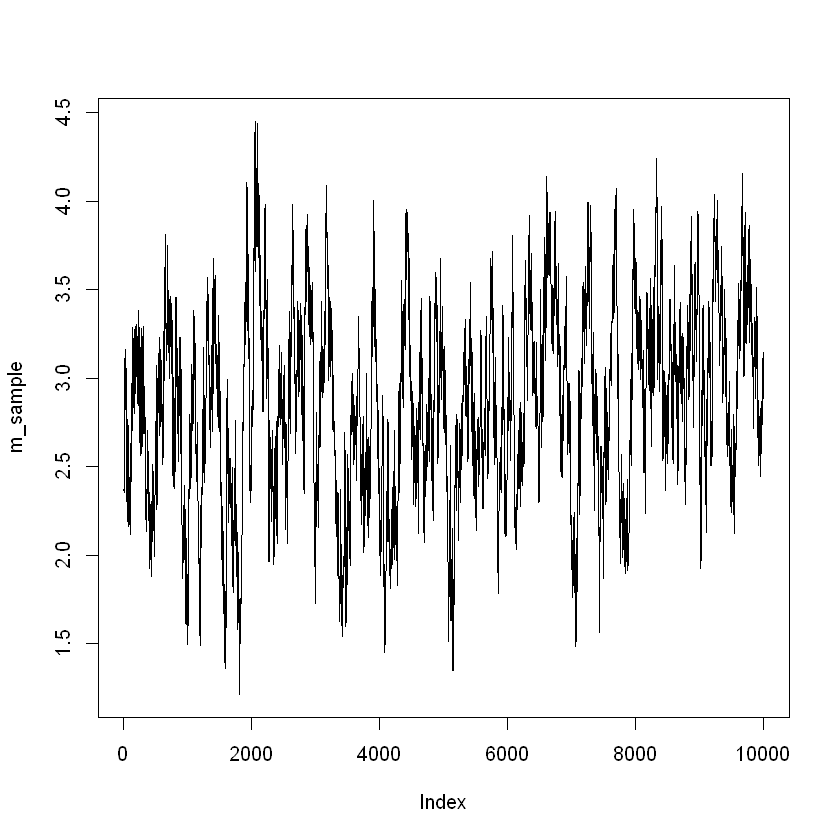

In [13]:
plot(m_sample, type="l")

### Scatterplot

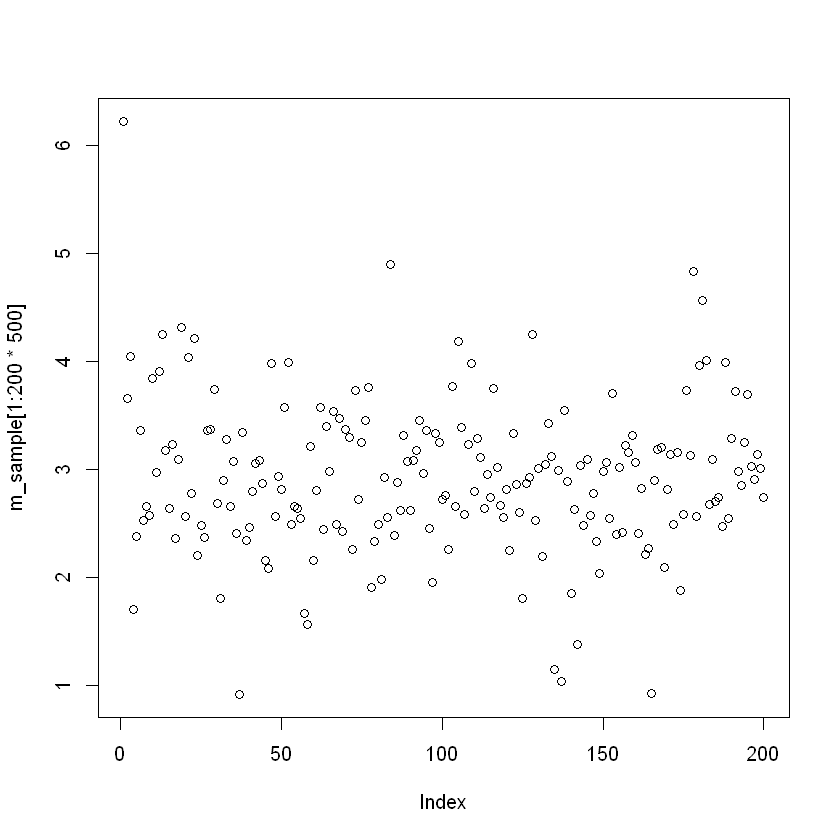

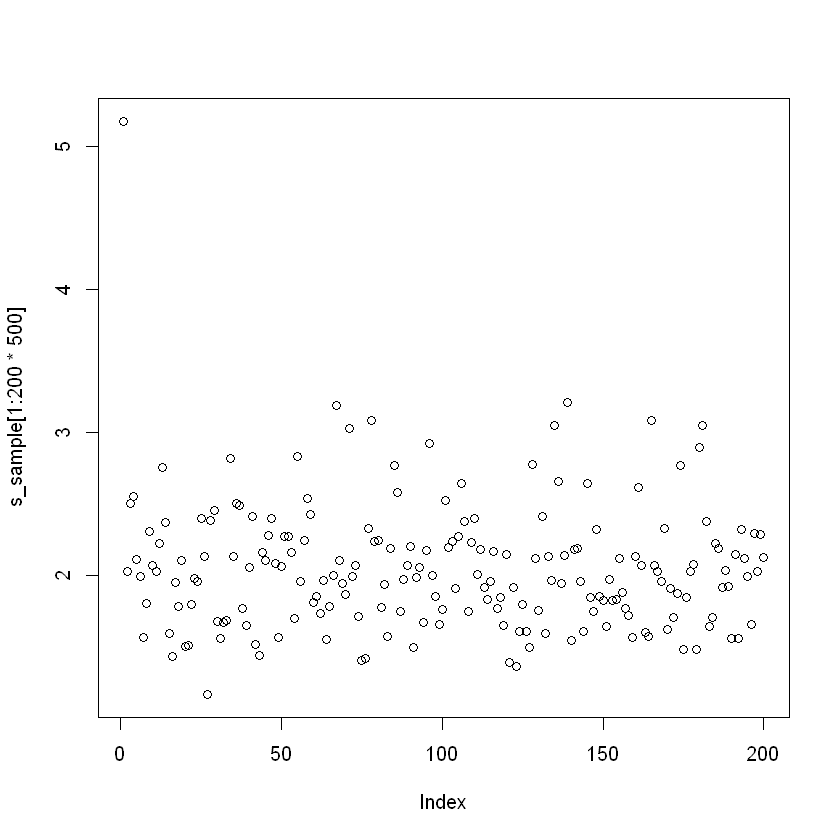

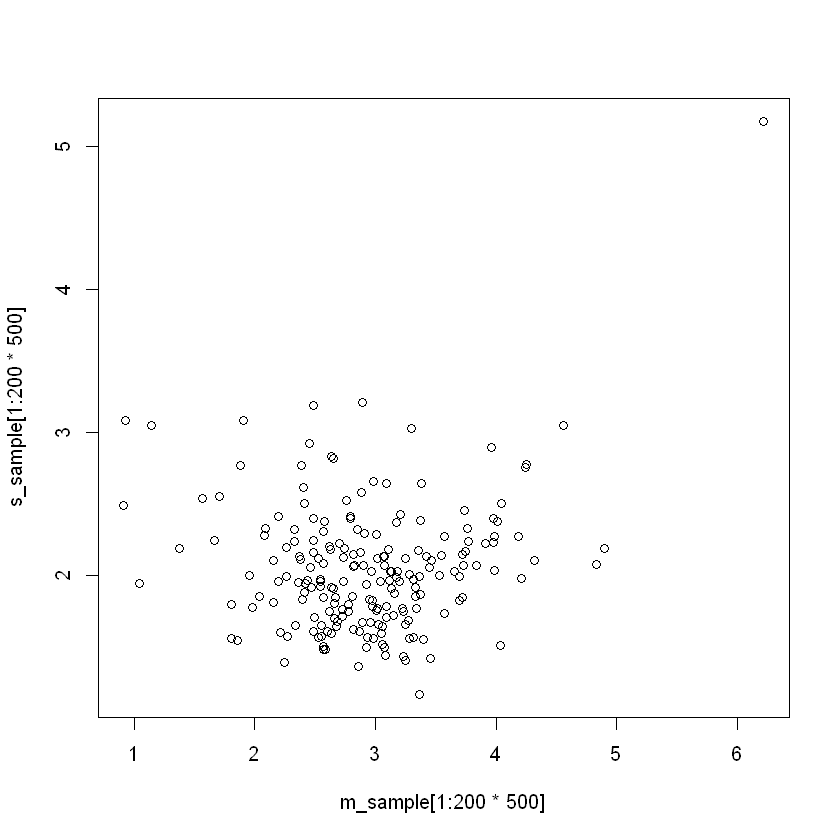

In [4]:
plot(m_sample[1:200*500])
plot(s_sample[1:200*500])
plot(m_sample[1:200*500],s_sample[1:200*500])

### Histogram

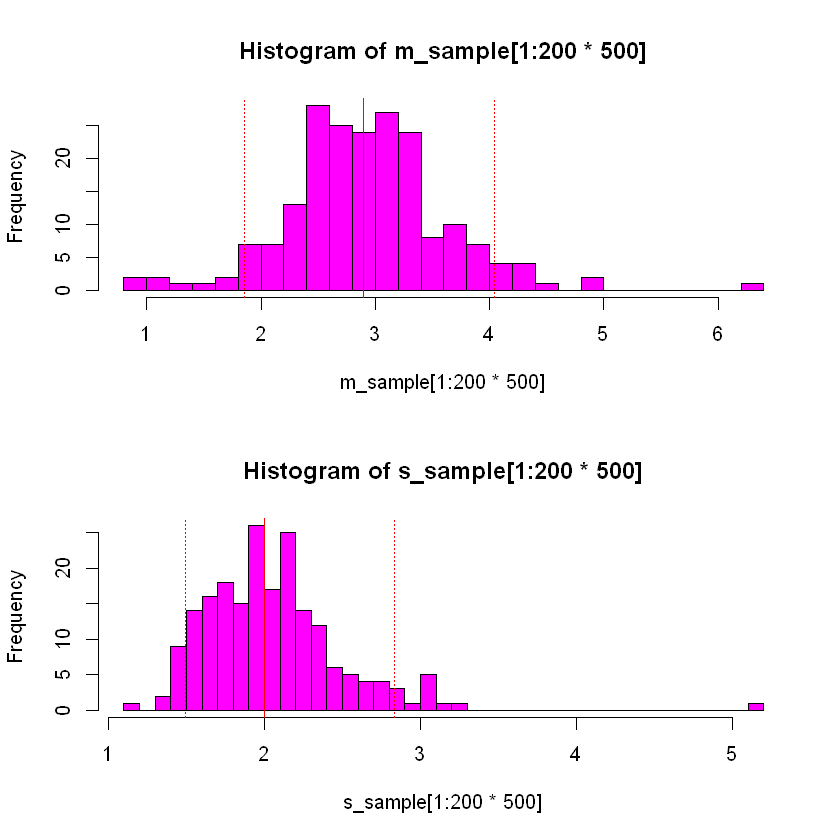

In [5]:
par(mfcol=c(2,1))
hist(m_sample[1:200*500],breaks=30,col="magenta")
abline(v=quantile(m_sample[1:200*500],c(0.05,0.5,0.95)),lty=c(3,1,3),col="red")
hist(s_sample[1:200*500],breaks=30,col="magenta")
abline(v=quantile(s_sample[1:200*500],c(0.05,0.5,0.95)),lty=c(3,1,3),col="red")
par(mfcol=c(1,1))

### Credible interval

In [6]:
quantile(m_sample[1:200*500],c(0.05,0.95))
quantile(s_sample[1:200*500],c(0.05,0.95))

5%      95% 
1.853520 4.039762

5%      95% 
1.494035 2.832406

### posterior mean

In [7]:
mean(m_sample[1:200*500])
mean(s_sample[1:200*500])

[1] 2.925645

[1] 2.053729

# Bayesian Approach to Linear Regression

## Observed data:

In [11]:
x = 4

obs_x = runif(12,0,10)
obs_y = 3 * x + 2 + rnorm(12,mean=0,sd=1)
# Log of (unnormalized) posterior density
logPosterior = function(b0_, b1_, sigma_){
    sum(dnormal(b0_+b1_*obs_x - obs_y, 0, sigma_, log=T))
}

## Starting value

In [9]:
b0 = runif(1,0,1)
b1 = runif(1,0,1)
sigma = runif(1,0,1)

## Collect sample

In [ ]:
b0_sample = c()
b1_sample = c()
sigma_sample = c()

## Bayesian Data Analysis via MCMC

In [12]:
for(i in 1:10000) {
    b0_prop = rnorm(b0,0,0.1)
    b1_prop = rnorm(b1,0,0.1)
    s_prop = abs(rnorm(sigma,0,0.1))
    R = exp(logPosterior(b0_prop, b1_prop, s_prop)-logPosterior(b0, b1, sigma))
    u = runif(1,0,1)
    if( u < R) {
        b0 = b0_prop
        b1 = b1_prop
        sigma = s_prop
    }
    b0_sample = c(b0_sample,b0)
    b1_sample = c(b1_sample,b1)
    sigma_sample = c(sigma_sample,sigma)
}

ERROR: Error in dnormal(b0_ + b1_ * obs_x - obs_y, 0, sigma_, log = T): konnte Funktion "dnormal" nicht finden
